# CASO PRACTICO LIBRERÍA PYTORCH

## Caso Practico: Clasificacion de Dígitos MNIST con PyTorch

Paso 2: Importar las Librerias Necesarias

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Paso 3: Cargar y Procesar el Conjunto de Datos MNIST

In [ ]:
# Transformacion: Convertir las Imágenes a tensores y normalizarlas
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# Descargar el conjunto de datos MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


Visualizar algunas imagenes del conjuntos de datos

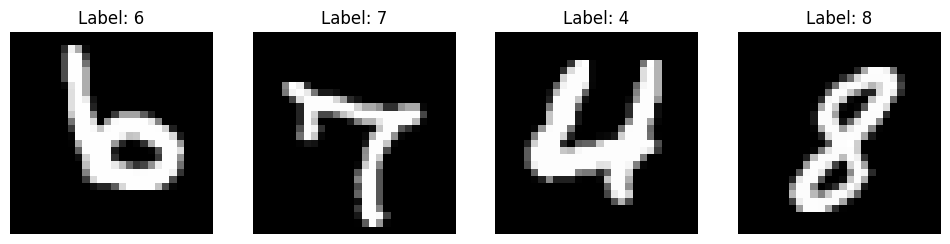

In [ ]:
# Visulizar algunas imágenes del conjuntos de datos
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Descargar las imágenes
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for i in range(4):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {labels[i].item()}')
    axes[i].axis('off')
plt.show()

Paso 4: Definir la Estructura de la Red Neuronal Aqui definimos una res neuronal simple con una capa oculta

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) # Capa de entrada -> 128 neuronas
        self.relu = nn.ReLU()              # Función de activación ReLU
        self.fc2 = nn.Linear(128, 10)      # 128 neuronas -> 10 neuronas de salida (una por cada digito)

    def forward(self, x):
        x = x.view(-1, 28 * 28)            # Aplanar la imagen (1X28X28 -> 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# instalacion la red neuronal
net = SimpleNN()

Paso 5: Definir Funciones de Pérdida y el Optimizador

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

Paso 6: Entrenar la Red Neuronal

In [ ]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0
print('Finished training')

Epoch 1, Batch 100, Loss: 1.893
Epoch 1, Batch 200, Loss: 1.188
Epoch 1, Batch 300, Loss: 0.798
Epoch 1, Batch 400, Loss: 0.647
Epoch 1, Batch 500, Loss: 0.561
Epoch 1, Batch 600, Loss: 0.523
Epoch 1, Batch 700, Loss: 0.463
Epoch 1, Batch 800, Loss: 0.440
Epoch 1, Batch 900, Loss: 0.434
Epoch 2, Batch 100, Loss: 0.400
Epoch 2, Batch 200, Loss: 0.406
Epoch 2, Batch 300, Loss: 0.377
Epoch 2, Batch 400, Loss: 0.388
Epoch 2, Batch 500, Loss: 0.383
Epoch 2, Batch 600, Loss: 0.367
Epoch 2, Batch 700, Loss: 0.355
Epoch 2, Batch 800, Loss: 0.339
Epoch 2, Batch 900, Loss: 0.331
Epoch 3, Batch 100, Loss: 0.330
Epoch 3, Batch 200, Loss: 0.318
Epoch 3, Batch 300, Loss: 0.327
Epoch 3, Batch 400, Loss: 0.319
Epoch 3, Batch 500, Loss: 0.342
Epoch 3, Batch 600, Loss: 0.349
Epoch 3, Batch 700, Loss: 0.306
Epoch 3, Batch 800, Loss: 0.307
Epoch 3, Batch 900, Loss: 0.335
Epoch 4, Batch 100, Loss: 0.311
Epoch 4, Batch 200, Loss: 0.295
Epoch 4, Batch 300, Loss: 0.297
Epoch 4, Batch 400, Loss: 0.316
Epoch 4,

paso 7: Evaluar el Modelo

In [ ]:
correct = 0
total = 0
with torch.no_grad(): # No necesitamos calcular gradientes en la fase de evaluacion
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Accuracy of the model on the 10,000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10,000 test images: 94.61%


Predicir y evaluar el Modelo con imagenes de prueba

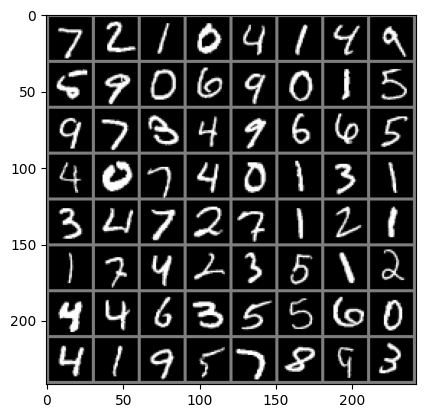

Labels:     7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3
Predicted:  7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3


In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtener un lote de imágenes de prueva
dataiter = iter(testloader)
images, labels = next(dataiter)

# Realizar Prediccion
outputs = net(images)
_, predicted = torch.max(outputs.data, 1)

# Mostrar imágenes y predicciones
imshow(torchvision.utils.make_grid(images))

print('Labels:    ', ' '.join(f'{labels[j].item()}' for j in range(len(labels))))
print('Predicted: ', ' '.join(f'{predicted[j].item()}' for j in range(len(predicted))))

